#Essentials of Machine Learning Algorithms

Supervised Machine Learning Algorithms:
*Linear Regression
*Logistic Regression
*Decision Tree
*Support Vector Machines (SVM)
*Naive Bayes
*K-Nearest Neighbors(KNN)

Ensemble algorithm of supervised machine learning:
*Random Forest
*Gradient Boosting: GBM
*Gradient Boosting: XGBoost
*Gradient Boosting: LightGBM

Unsupervised Machine Learning Algorithms:
*k-means

Dismensionality reduction algorithms:
*PCA
*FactorAnalysis

Coefficient: 
 [[ 1.03057318]]
Intercept: 
 [-0.1382723]


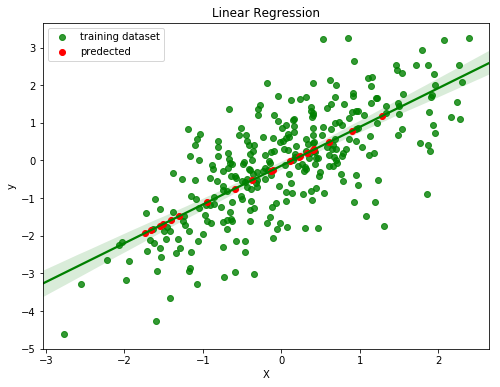

In [53]:
# Supervised machine learnin algorithm: Linear Regression

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn

np.random.seed(0)
size = 300

X_train = np.random.normal(0, 1, (size, 1))
y_train = X_train + np.random.normal(0, 1, (size, 1))
X_test = np.random.normal(0, 1, (20, 1))

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
print("Coefficient:", "\n", lr.coef_)
print("Intercept:", "\n", lr.intercept_)
predicted = lr.predict(X_test)

# Plot the results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax = seaborn.regplot(x=X_train[:,0], y=y_train[:,0], color="g", label="training dataset")
plt.scatter(X_test, predicted, c="r", label="predected")
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Accuracy score: 
 0.958

Cross validation score:
0.9509

Coefficient: 
 [[-54.36042727]]
Intercept: 
 [ 3.23573761]



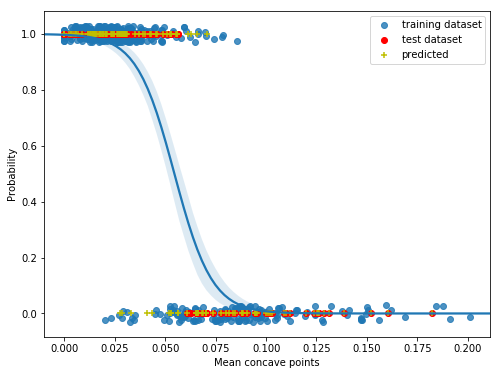

In [46]:
# Supervised machine learning algorithm: Logistic Regression

import numpy as np
import pandas as pd
# import statsmodels
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn

bc_data = load_breast_cancer()
X = bc_data["data"] # mean concave points
y = bc_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

logir = LogisticRegression(penalty="l1")

logir.fit(X_train, y_train)
# logir.score(X_train, y_train)
predicted = logir.predict(X_test)

print("Accuracy score:", "\n", round(accuracy_score(y_test, predicted), 4))
print()
print("Cross validation score:")
print(round(np.mean(cross_val_score(logir, X, y, scoring="accuracy", cv=10)), 4))
print()

# choose only the variable "Mean concave points"
X_train_7 = X_train[:, 7].reshape(X_train.shape[0], 1)
X_test_7 = X_test[:, 7].reshape(X_test.shape[0], 1)

logir.fit(X_train_7, y_train)
logir.score(X_train_7, y_train)

print("Coefficient:","\n", logir.coef_)
print("Intercept:", "\n", logir.intercept_)
print()

predicted_7 = logir.predict(X_test_7)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax = seaborn.regplot(x=X_train_7, y=y_train, logistic=True, n_boot=500, y_jitter=0.03, label="training dataset")
ax.set_xlabel("Mean concave points")
ax.set_ylabel("Probability")
plt.scatter(X_test_7, predicted_7, c="r", label="test dataset")
plt.scatter(X_test_7, y_test, marker="+", c="y", label="predicted")
plt.legend()
plt.show()

Accuracy score: 
 0.9737

Cross validation score:
0.96



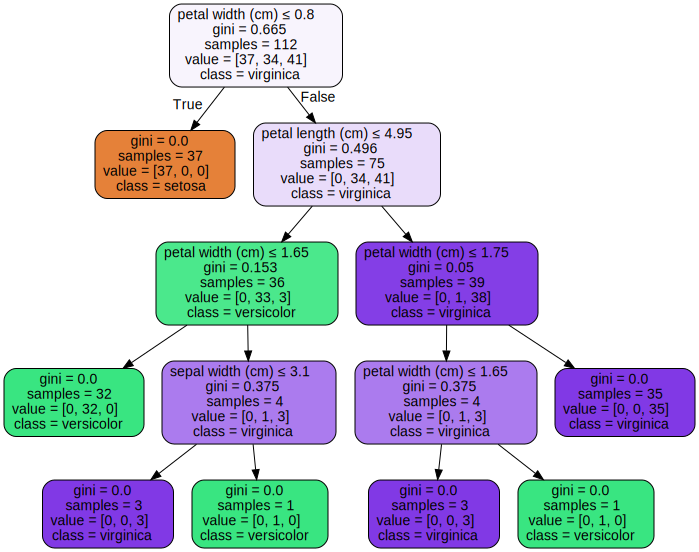

In [60]:
# Supervised machine learning algorithm: Decision Tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["feature_names"]
species = iris["target_names"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

dtree = DecisionTreeClassifier(random_state=0) # for classification, here the algorithm can be gini (criterion="gini") or entropy (information gain. criterion="entropy"). By default it is gini.
dtree.fit(X_train, y_train)
# dtree.score(X_train, y_train)
predicted = dtree.predict(X_test)
print("Accuracy score:", "\n", round(accuracy_score(y_test, predicted), 4))
print()
print("Cross validation score:")
print(round(np.mean(cross_val_score(dtree, X, y, scoring="accuracy", cv=10)), 4))
print()

dot_data = export_graphviz(dtree, out_file=None, feature_names=names, class_names=species, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render("iris") # To save the results in an output file "iris.pdf"
graph # To show the results


Accuracy score:
0.9737

Cross validation score:
0.9733


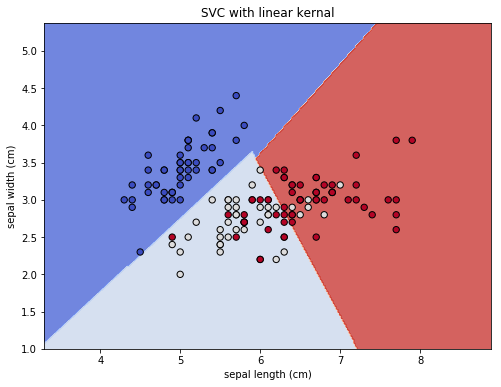

In [44]:
# Supervised machine learning algorithm: SVMs (Support Vector Machines)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["feature_names"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

svm = SVC(C=1.0, kernel="linear", random_state=0)

svm.fit(X_train, y_train)
predicted= svm.predict(X_test)
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()
print("Cross validation score:")
print(round(np.mean(cross_val_score(svm, X, y, scoring="accuracy", cv=10)), 4))

# plot SVM results
# Take the first two features
X = X[:, :2]
svm.fit(X, y)
X0, X1 = X[:, 0], X[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title("SVC with linear kernal")
plt.show()



Accuracy score:
1.0

Cross validation score:
0.9533


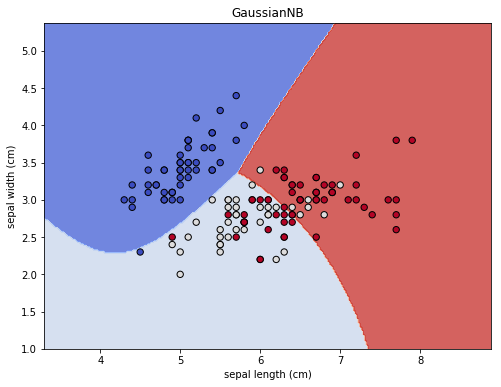

In [43]:
# Supervised machine learning algorithm: Naive Bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["feature_names"]

nb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

nb.fit(X_train, y_train)
predicted = nb.predict(X_test)
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()
print("Cross validation score:")
print(round(np.mean(cross_val_score(nb, X, y, scoring="accuracy", cv=10)), 4))
print

# plot the results
# Take the first two features and Predict the classification probabilities on a grid
X = X[:, :2]
X0, X1 = X[:, 0], X[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
nb.fit(X, y)
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title("GaussianNB")
plt.show()



Accuracy score:
1.0

Cross validation score:
0.98



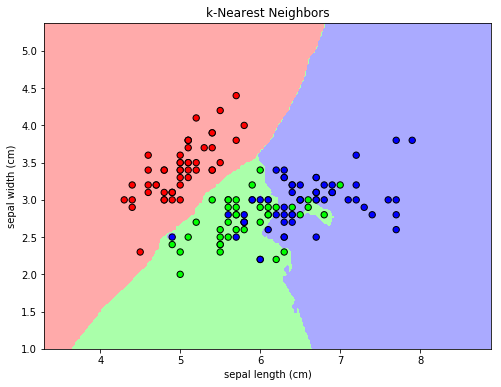

In [42]:
# Supervised machine learning algorithm: KNN (K-Nearest Neighbors)
# KNN can be used for both classification and regression problems
# KNN is computationally expensive
# Variables should be normalized else higher range variables can bias it
# Works on pre-processing stage more before going for KNN like outlier, noise removal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["feature_names"]

knn = KNeighborsClassifier(n_neighbors=15, weights="distance") # Default vale for n_neighbors=5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted)))
print()
print("Cross validation score:")
print(round(np.mean(cross_val_score(knn, X, y, scoring="accuracy", cv=10)), 4))
print()

# Plot the results
# Take the first two features
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
X = X[:, :2]
knn.fit(X, y)
X0, X1 = X[:, 0], X[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, Z, cmap=cmap_light)
ax.scatter(X0, X1, c=y, cmap=cmap_bold, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title("k-Nearest Neighbors")
plt.show()


Accuracy score:
0.8947



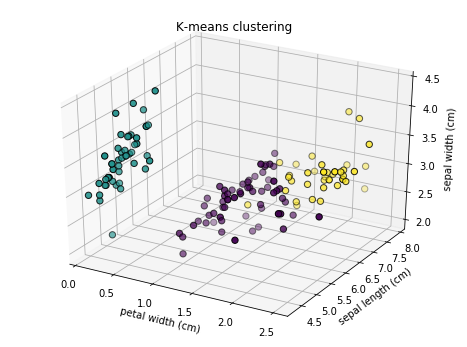

In [63]:
# Unsupervised machine learning algorithm: k-means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["feature_names"]

km = KMeans(n_clusters=3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

km.fit(X_train)
predicted = km.predict(X_test)
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()

# Plot the results
km.fit(X)
labels = km.labels_
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 3], X[:, 0], X[:, 1], zdir="z", c=labels.astype(np.float), s=40, depthshade=True, edgecolors="k")
ax.set_xlabel(names[3])
ax.set_ylabel(names[0])
ax.set_zlabel(names[1])
ax.set_title("K-means clustering")
plt.show()


Accuracy score:
0.9737

Cross validation score:
0.9534



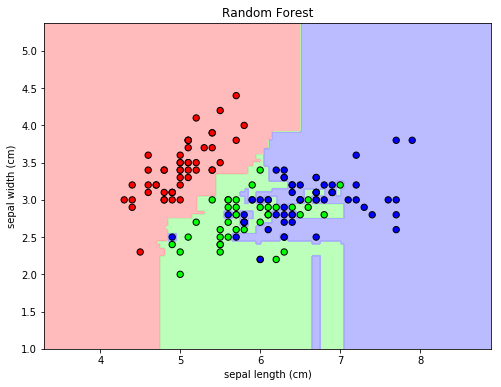

In [41]:
# Ensemble algorithm of supervised machine learning: Random Forest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["feature_names"]

rf = RandomForestClassifier(n_estimators=30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()
print("Cross validation score:")
print(round(np.mean(cross_val_score(rf, X, y)), 4))
print()

# Plot the results
# Take the first two features
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
X = X[:, :2]
rf.fit(X, y)
X0, X1 = X[:, 0], X[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=cmap_bold, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title("Random Forest")
plt.show()


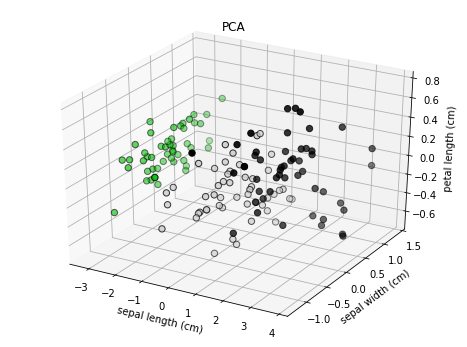

SVM; original dimension of datasets
Accuracy score:
0.9737

SVM; reduced dimension of datasets
Accuracy score:
0.9737



In [24]:
# Dismensionality reduction algorithm: PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["feature_names"]

pca = PCA(n_components=4, random_state=0)

# Plot the results
pca.fit(X)
X = pca.transform(X)
y = np.choose(y, [1, 2, 0])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], zdir="z", c=y.astype(np.float), cmap=plt.cm.spectral, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_zlabel(names[2])
ax.set_title("PCA")
plt.show()

# To reduce the dimension of datasets using PCA
X = iris["data"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

svm = SVC(C=1.0, kernel="linear", random_state=0)

svm.fit(X_train, y_train)
predicted = svm.predict(X_test)
print("SVM; original dimension of datasets")
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()

svm.fit(X_train_reduced, y_train)
predicted = svm.predict(X_test_reduced)
print("SVM; reduced dimension of datasets")
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()


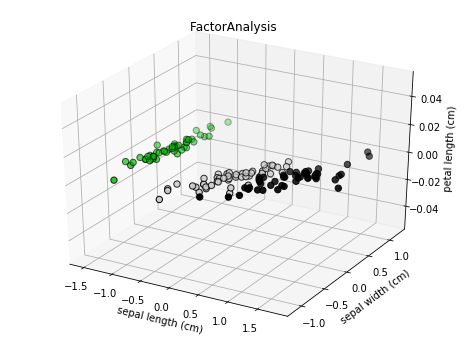

SVM; original dimension of datasets
Accuracy score:
0.9737

SVM; reduced dimension of datasets
Accuracy score:
0.9737



In [23]:
# Dismensionality reduction algorithm: FactorAnalysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["feature_names"]

fa = FactorAnalysis(n_components=4, random_state=0)

# Plot the results
fa.fit(X)
X = fa.transform(X)
y = np.choose(y, [1, 2, 0])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], zdir="z", c=y.astype(np.float), cmap=plt.cm.spectral, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_zlabel(names[2])
ax.set_title("FactorAnalysis")
plt.show()

# To reduce the dimension of datasets using FactorAnalysis
X = iris["data"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
fa.fit(X_train)
X_train_reduced = fa.transform(X_train)
X_test_reduced = fa.transform(X_test)

svm = SVC(C=1.0, kernel="linear", random_state=0)

svm.fit(X_train, y_train)
predicted1 = svm.predict(X_test)
print("SVM; original dimension of datasets")
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted1), 4))
print()

svm.fit(X_train_reduced, y_train)
predicted2 = svm.predict(X_test_reduced)
print("SVM; reduced dimension of datasets")
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted2), 4))
print()


Accuracy score:
0.965

Cross validation score:
0.9527



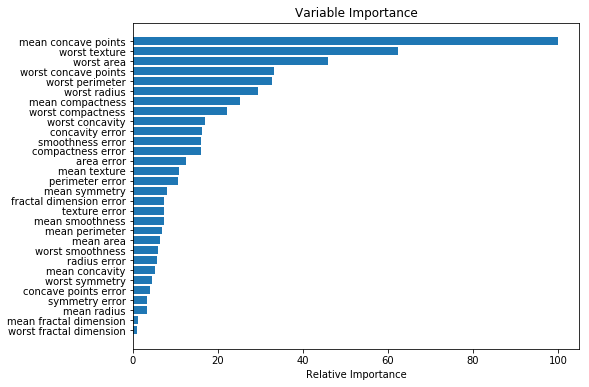

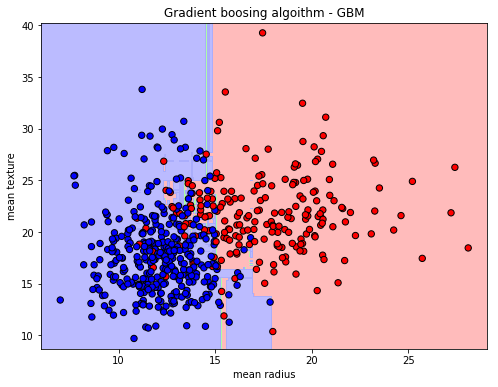

In [138]:
# Ensemble algorithm - Gradient boosting algorithm: GBM
# Boosting is actually an ensemble of learning algorithms which combine the prediction of 
# serveral base estimators in order to improve robustness over a single estimator.
# Boosted algorithms are used when using a plenty of data to make a prediction.
# It combines multiple weak or average predictors to build a strong predictor.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

bc = load_breast_cancer()
X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=4, min_samples_split=2)

gb.fit(X_train, y_train)
predicted = gb.predict(X_test)
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()
print("Cross validation score:")
print(round(np.mean(cross_val_score(gb, X, y, scoring="accuracy", cv=10)), 4))
print()

# Plot feature importance
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
yticks = names[sorted_idx]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, yticks)
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

# Plot the results
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
X = X[:, :2]
gb.fit(X, y)
X0, X1 = X[:, 0], X[:, 1]
xx_min, xx_max = X0.min() - 1, X0.max() + 1
yy_min, yy_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(xx_min, xx_max, 0.02), np.arange(yy_min, yy_max, 0.02))
Z = gb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=cmap_bold, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title("Gradient boosing algoithm - GBM")
plt.show()


Accuracy score:
0.972

Accuracy value (ROC AUC score):
0.9739



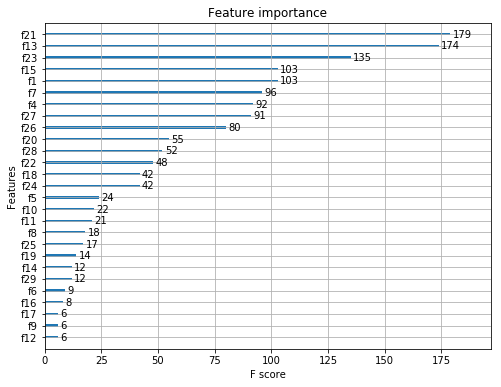

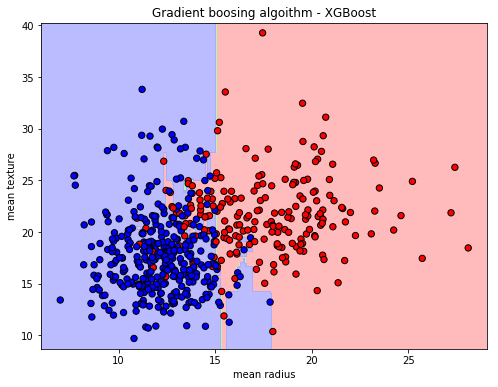

In [151]:
# Ensemble algorithm - Gradient boosting algorithm: XGBoost
# XGBoost has an immensely high predictive power which makes it the best choice for accuracy
# in events as it possesses both linear model and the tree learning algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import graphviz
import seaborn
from sklearn.datasets import load_iris, load_breast_cancer
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Load dataset
bc = load_breast_cancer()
X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Set parameters
paras = {"max_depth": 8, "learning_rate": 0.05, "n_estimators": 500, "silent": 1, "base_score": 0.5}

xgbc = XGBClassifier(**paras)

xgbc.fit(X_train, y_train)
predicted = xgbc.predict(X_test)
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()

# Compute Area Under the ROC curve (AUC) from prediction score
print("Accuracy value (ROC AUC score):")
print(round(roc_auc_score(y_test, predicted), 4))
print()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
xgb.plot_importance(xgbc, ax)
plt.show()

# Plot the results
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
X = X[:, :2]
xgbc.fit(X, y)
X0, X1 = X[:, 0], X[:, 1]
xx_min, xx_max = X0.min() - 1, X0.max() + 1
yy_min, yy_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(xx_min, xx_max, 0.02), np.arange(yy_min, yy_max, 0.02))
Z = xgbc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=cmap_bold, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title("Gradient boosing algoithm - XGBoost")
plt.show()


Execution time of the XGBoost model:
0:00:00.051142

Accuracy score:
0.979

Accuracy value (ROC AUC score):
0.9833



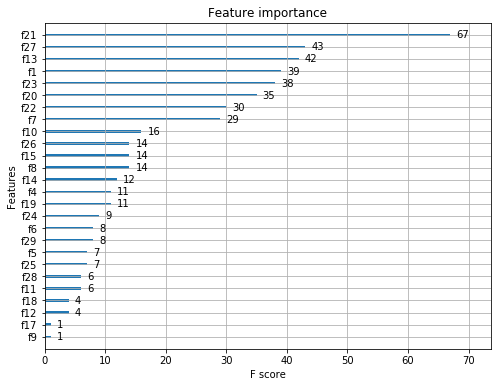

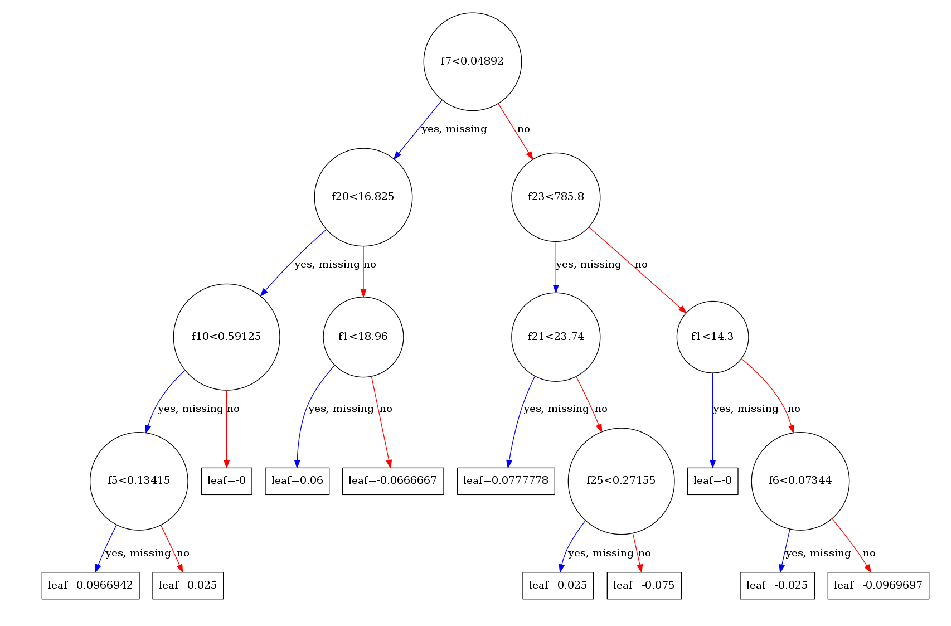

In [150]:
# A different way to use XGBoost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn
import graphviz
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Load dataset
bc = load_breast_cancer()
X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# The data is stored in a DMatrix object. label is used to define the outcome variable
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test)

# Set parameters for xgboost
parameters = {'max_depth':8, "n_estimators": 500, 'eta':1, 'silent':1, "objective": "binary:logistic", 'eval_metric':'auc', 'learning_rate':0.05}

# Train the model
num_round=50
from datetime import datetime
start = datetime.now()
xg = xgb.train(parameters, dtrain, num_round)
stop = datetime.now()

# Execution time of the model
# datetime.timedelta( , , ) representation => (days , seconds , microseconds)
execution_time_xgb = stop - start
print("Execution time of the XGBoost model:")
print(execution_time_xgb)
print()
 
# Predict the model on test set 
y_pred = xg.predict(dtest)
y_pred

# Convert probabilities into 1 or 0  
for i in range(0, X_test.shape[0]):
    if y_pred[i] >= 0.5:       # setting threshold to 0.5
        y_pred[i] = 1
    else: 
        y_pred[i] = 0
        
accuracy_xgb = accuracy_score(y_test,y_pred)
print("Accuracy score:")
print(round(accuracy_xgb, 4))
print()

print("Accuracy value (ROC AUC score):")
print(round(roc_auc_score(y_test, y_pred), 4))
print()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
xgb.plot_importance(xg, ax)
plt.show()

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
xgb.plot_tree(xg, ax=ax)
plt.show()

#graph = xgb.to_graphviz(xg, num_trees=2)
#graph.render("bc_xgb") # To save the results in an output file "bc_xgb.pdf"
#graph # To show the results


Accuracy score:
0.9441

Accuracy value (ROC AUC score):
0.9478



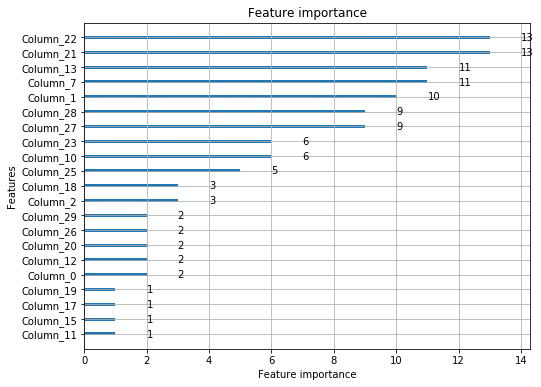

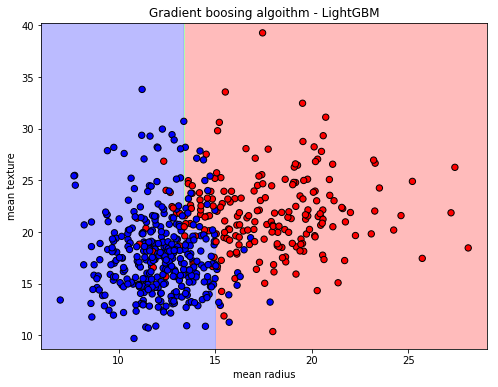

In [148]:
# Ensemble algorithm - Gradient Boosting algorithm: LightGBM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import graphviz
import seaborn
from sklearn.datasets import load_iris, load_breast_cancer
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
bc = load_breast_cancer()
X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Set parameter
param = {"num_leaves":255, "max_depth":8, "learning_rate":0.05, "max_bin":255}

lgb = LGBMClassifier(**param)

lgb.fit(X_train, y_train)
predicted = lgb.predict(X_test)
print("Accuracy score:")
print(round(accuracy_score(y_test, predicted), 4))
print()

# Compute Area Under the ROC curve (AUC) from prediction score
print("Accuracy value (ROC AUC score):")
print(round(roc_auc_score(y_test, predicted), 4))
print()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
lgbm.plot_importance(lgb, ax)
plt.show()

# Plot the results
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
X = X[:, :2]
lgb.fit(X, y)
X0, X1 = X[:, 0], X[:, 1]
xx_min, xx_max = X0.min() - 1, X0.max() + 1
yy_min, yy_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(xx_min, xx_max, 0.02), np.arange(yy_min, yy_max, 0.02))
Z = lgb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=cmap_bold, s=40, edgecolors="k")
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_title("Gradient boosing algoithm - LightGBM")
plt.show()


Execution time of the LightGBM model:
0:00:00.097280

Accuracy score:
0.958

Accuracy value (ROC AUC score):
0.9589



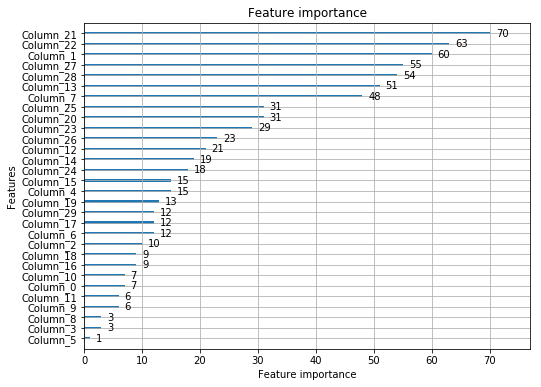

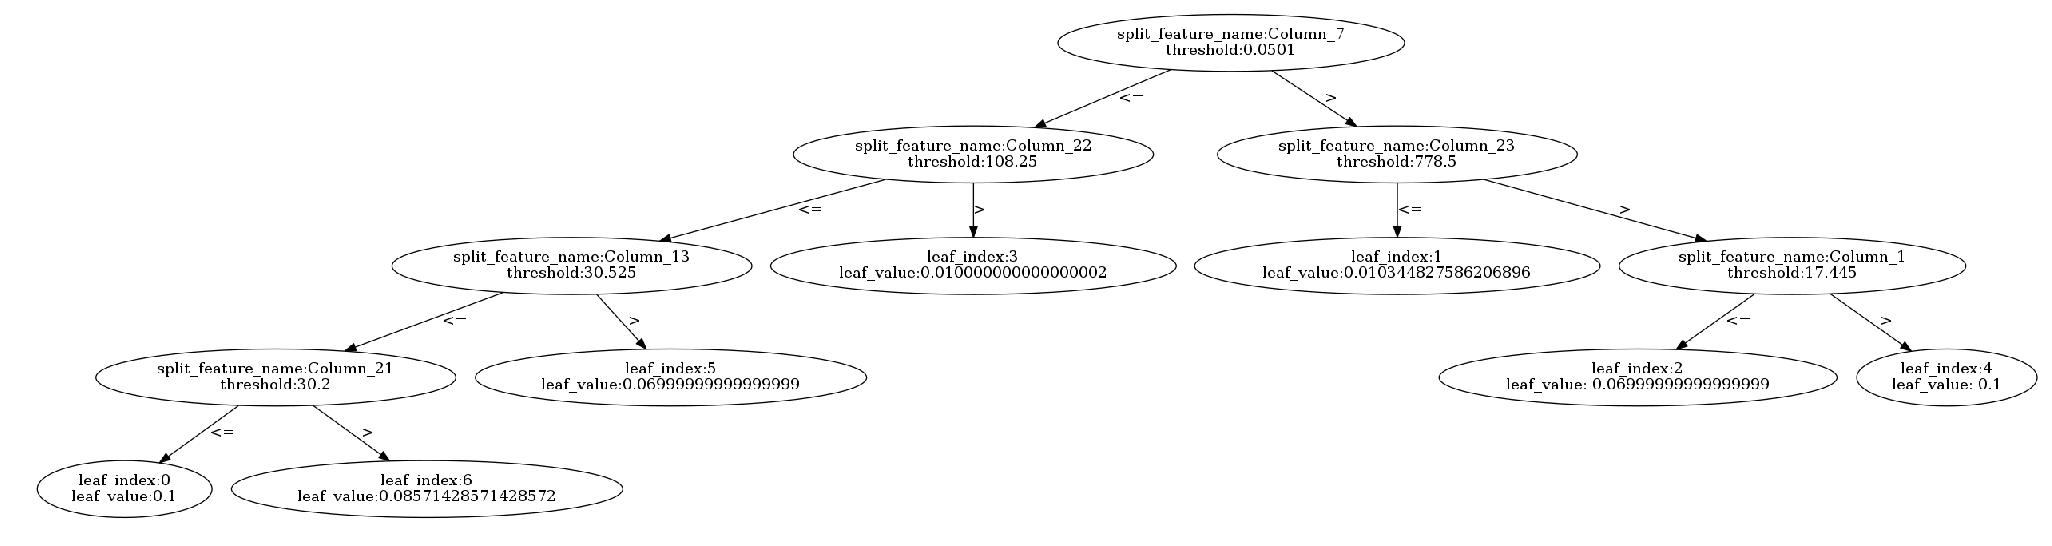

In [149]:
# A different way to use LightGBM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn
import graphviz
from sklearn.datasets import load_breast_cancer
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Load dataset
bc = load_breast_cancer()
X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# The data is stored in a DMatrix object. label is used to define the outcome variable
dtrain = lgbm.Dataset(X_train,label=y_train)

# Set parameters for xgboost
parameters = {'num_leaves':255, 'objective':'binary','max_depth':8,'learning_rate':0.05,'max_bin':255}
parameters['metric'] = ['auc', 'binary_logloss']

# Train the model
num_round=50
from datetime import datetime
start = datetime.now()
lgb = lgbm.train(parameters, dtrain, num_round)
stop = datetime.now()

# Execution time of the model
# datetime.timedelta( , , ) representation => (days , seconds , microseconds)
execution_time_lgbm = stop - start
print("Execution time of the LightGBM model:")
print(execution_time_lgbm)
print()
 
# Predict the model on test set 
y_pred = lgb.predict(X_test)
y_pred

# Convert probabilities into 1 or 0  
for i in range(0, X_test.shape[0]):
    if y_pred[i] >= 0.5:       # setting threshold to 0.5
        y_pred[i] = 1
    else: 
        y_pred[i] = 0
        
accuracy_lgbm = accuracy_score(y_test,y_pred)
print("Accuracy score:")
print(round(accuracy_lgbm, 4))
print()

print("Accuracy value (ROC AUC score):")
print(round(roc_auc_score(y_test, y_pred), 4))
print()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax = lgbm.plot_importance(lgb, ax)
plt.show()

lgbm.plot_tree(lgb, figsize=(36, 36))
plt.show()

